# Notebook Position detection

## Content:
1. [Imports](#Imports)
2. [Read data](#Read_data)
3. [Modelling](#Modelling)
4. [Tuning](#Tuning)
5. [Results](#Results)


## Summary
Given a football player $u$ with seasonal KPI data and match event data we want to detect its playing position $pos$, where $pos \in \{ST, CM, OW, FB, CB, GK\}$. This can be formulated as a clustering classification problem where we want to cluster all available football players $\mathbf{u}$ from the data into six different clusters. 


## 1. Imports <a class="anchor" id="Imports"></a>

In [1]:
# Basics
import pandas as pd
import json

# Project module
import modules.validation_lib as validate
import modules.helpers_lib as helper
from modules.config import positions


# Standarnization
from sklearn.preprocessing import MinMaxScaler



## 2. Read data <a class="anchor" id="Read_data"></a>
As inputs to the model there is the processed and filtered KPI-data and the processed and filtered match event data found in the data directory.

In [2]:
# Read model KPI dataframe from PL
df_KPI_PL = pd.read_excel('../data/model_kpis_with_GK_PL21-22.xlsx')

# Read model KPI dataframe from Allsvenskan, Sweden
df_KPI_Swe = pd.read_excel('../data/model_kpis_with_GK_Swe21.xlsx')

# read all acttions from PL
df_all_actions_PL = pd.read_excel('../data/all_actions_PL21-22.xlsx')

# read all actions from Allsvenskan, Sweden
df_all_actions_Swe = pd.read_excel('../data/all_actions_Swe21.xlsx')

# read validation data
df_validation = pd.read_excel('../data/validation_data.xlsx')

## 3. Modelling <a class="anchor" id="Modelling"></a>
Start with Kmeans clustering without any kpis used for modelling, only coordinates of passes.


### 3.1 Only passes results -  Premier League 21/22

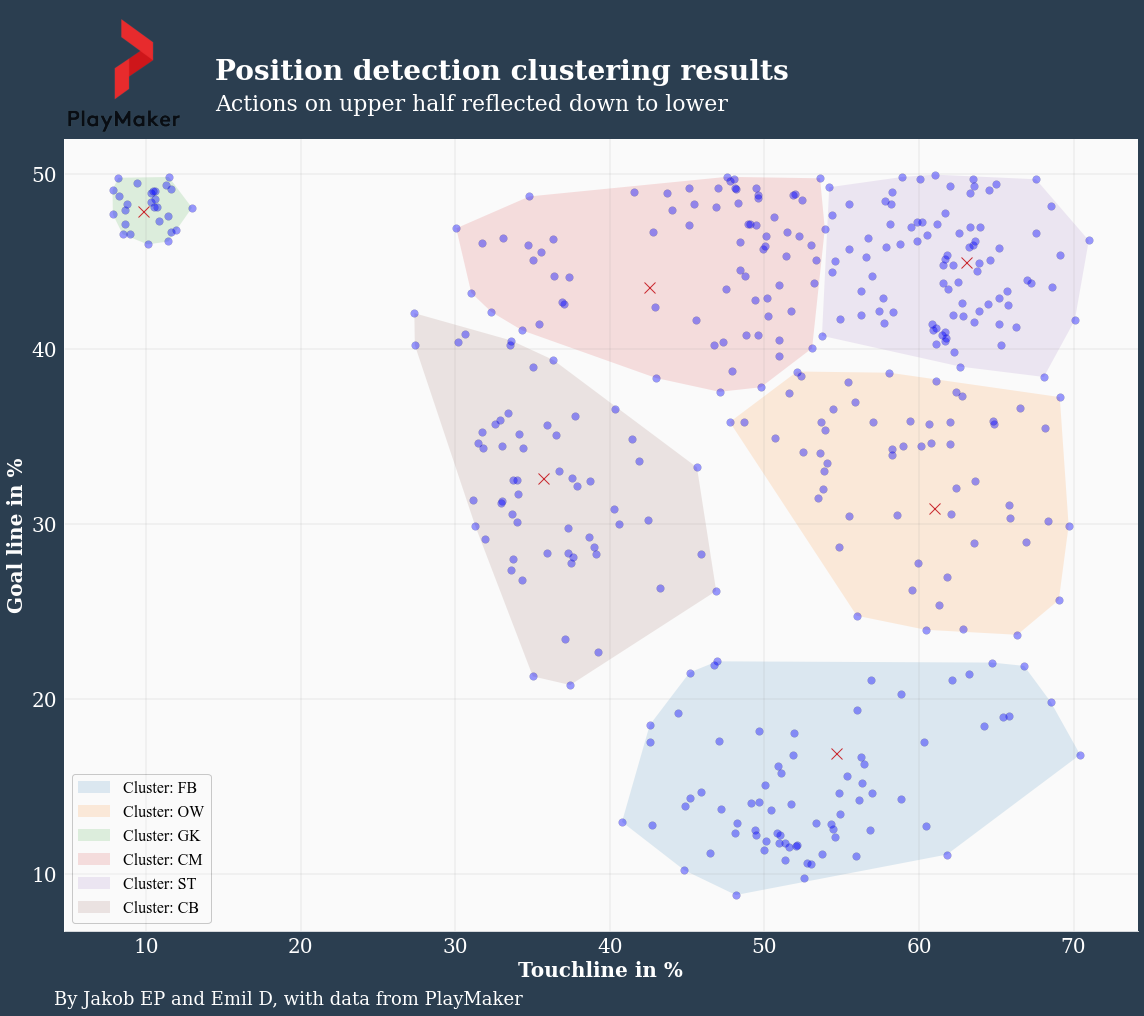

Confusion matrix result for position detection: 

+------------+------+------+------+------+------+-----------+
|            |   ST |   CM |   OW |   FB |   CB |   #actual |
+============+======+======+======+======+======+===========+
| ST         |   49 |    0 |    4 |    0 |    0 |        53 |
+------------+------+------+------+------+------+-----------+
| CM         |   22 |   53 |   17 |    1 |    0 |        93 |
+------------+------+------+------+------+------+-----------+
| OW         |   15 |    2 |   31 |   12 |    0 |        60 |
+------------+------+------+------+------+------+-----------+
| FB         |    1 |    0 |    2 |   53 |    2 |        58 |
+------------+------+------+------+------+------+-----------+
| CB         |    0 |   17 |    0 |    3 |   57 |        77 |
+------------+------+------+------+------+------+-----------+
| #predicted |   87 |   72 |   54 |   69 |   59 |       341 |
+------------+------+------+------+------+------+-----------+
Confusion matrix cla

In [3]:
# Detect the positions
df_detected_positions_PL = helper.find_positions(df_all_actions = df_all_actions_PL,
                                          df_KPI = df_KPI_PL,
                                          kpis_for_clustering = [], # No kpis
                                          only_passes_actions=True, # Only passes
                                          scaler = MinMaxScaler(), 
                                          show_plot=True,           
                                          )

# Compare detected positions to validation data
dict_validation_results_pos_PL = validate.create_validation_dataframes(
    df_detected_positions_PL, "Player_name", "player",
    "Position", "Cluster")

# Find the resulting dataframe from the dictionary
df_result_pos_PL = dict_validation_results_pos_PL['df_result']
df_correct_pos_PL = dict_validation_results_pos_PL['df_correct']
df_incorrect_pos_PL = dict_validation_results_pos_PL['df_incorrect']

# Compute and show the confusion matrix with accuracy
print("Confusion matrix result for position detection: \n")
df_conf_PL = validate.confusion_matrix(df_result_pos_PL, positions, 'predicted_class', 'actual_class', show_results=True)

# Compute confusion matrix metrics
print("Confusion matrix class metrics for position detection: \n")
df_class_metrics_pos_PL = validate.confusion_matrix_class_metrics(df_conf_PL, positions, show_results=True)


### 3.2 Only passes results -  Allsvenskan 21

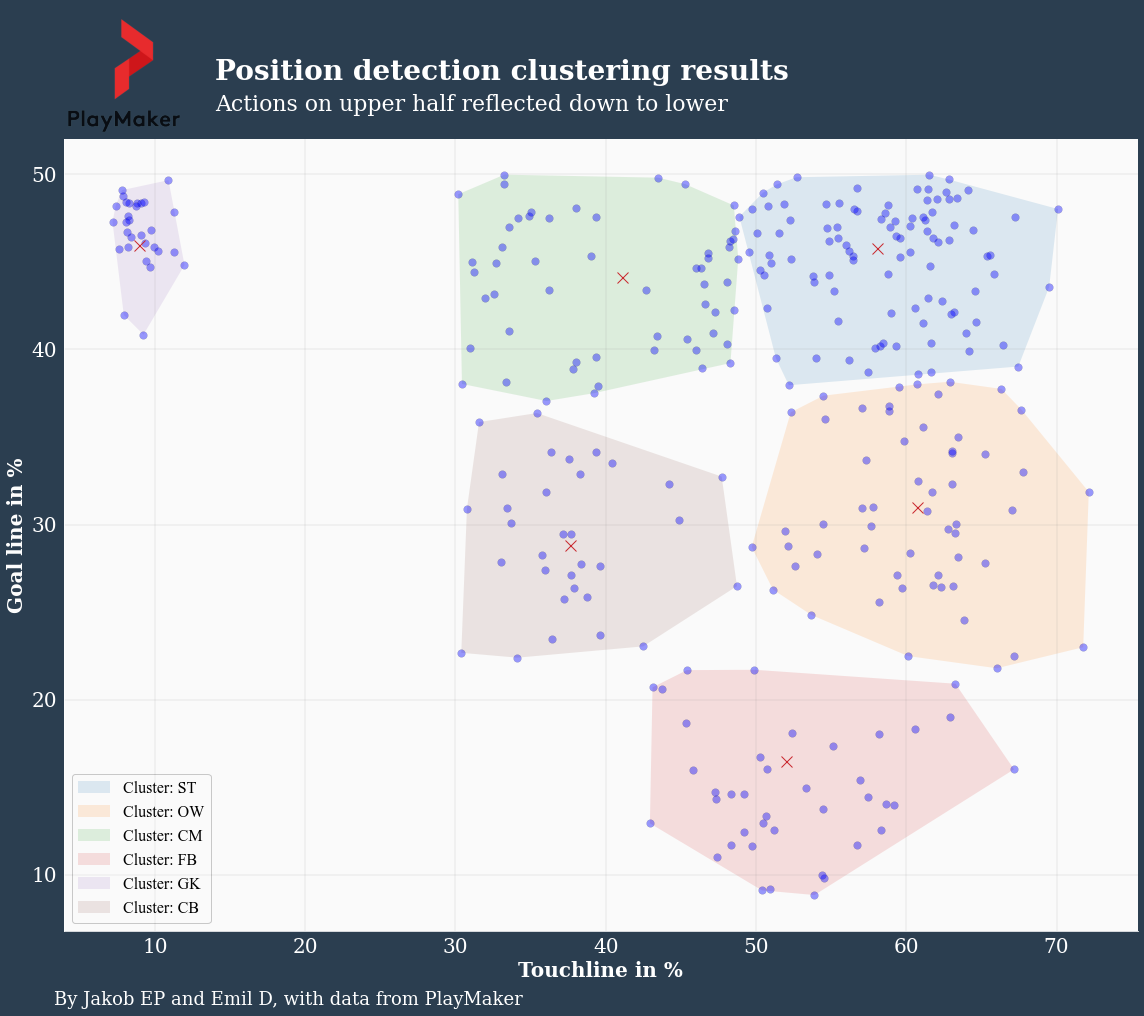

Confusion matrix result for position detection: 

+------------+------+------+------+------+------+-----------+
|            |   ST |   CM |   OW |   FB |   CB |   #actual |
+============+======+======+======+======+======+===========+
| ST         |   40 |    0 |    6 |    0 |    0 |        46 |
+------------+------+------+------+------+------+-----------+
| CM         |   41 |   24 |    9 |    0 |    2 |        76 |
+------------+------+------+------+------+------+-----------+
| OW         |   17 |    0 |   34 |    8 |    0 |        59 |
+------------+------+------+------+------+------+-----------+
| FB         |    0 |    3 |    7 |   29 |    2 |        41 |
+------------+------+------+------+------+------+-----------+
| CB         |    0 |   28 |    0 |    3 |   28 |        59 |
+------------+------+------+------+------+------+-----------+
| #predicted |   98 |   55 |   56 |   40 |   32 |       281 |
+------------+------+------+------+------+------+-----------+
Confusion matrix cla

In [4]:
# Detect the positions
df_detected_positions_Swe = helper.find_positions(df_all_actions = df_all_actions_Swe,
                                          df_KPI = df_KPI_Swe,
                                          kpis_for_clustering = [], # No kpis
                                          only_passes_actions=True, # Only passes
                                          scaler = MinMaxScaler(), 
                                          show_plot=True,           
                                          )

# Compare detected positions to validation data
dict_validation_results_pos_Swe = validate.create_validation_dataframes(
    df_detected_positions_Swe, "Player_name", "player",
    "Position", "Cluster")

# Find the resulting dataframe from the dictionary
df_result_pos_Swe = dict_validation_results_pos_Swe['df_result']
df_correct_pos_Swe = dict_validation_results_pos_Swe['df_correct']
df_incorrect_pos_Swe = dict_validation_results_pos_Swe['df_incorrect']

# Compute and show the confusion matrix with accuracy
print("Confusion matrix result for position detection: \n")
df_conf_Swe = validate.confusion_matrix(df_result_pos_Swe, positions, 'predicted_class', 'actual_class', show_results=True)

# Compute confusion matrix metrics
print("Confusion matrix class metrics for position detection: \n")
df_class_metrics_pos_Swe = validate.confusion_matrix_class_metrics(df_conf_Swe, positions, show_results=True)


## 4. Tuning <a class="anchor" id="Tuning"></a>
Tune the kpi-choices and whether or not to cluster with only passes actions or all actions used for Kmeans clustering.


In [5]:
# Choose kpis for Kmeans clustering
kpis_for_clustering = ['tib 90', 'dribb past 90',
                       'chall %', 'int 90',
                       'dze 90', 'xg 90',
                       'gain 90', 'headers 90',
                       'dribbles 90', 'passes share',]

# Choose whether or not to include all actions on the pitch and not just passes
only_passes = True

## 5. Results <a class="anchor" id="Results"></a>
Final results for the position detection model with kpi-settings from the tuning parameter above.

### 5.1 Premier League 21/22

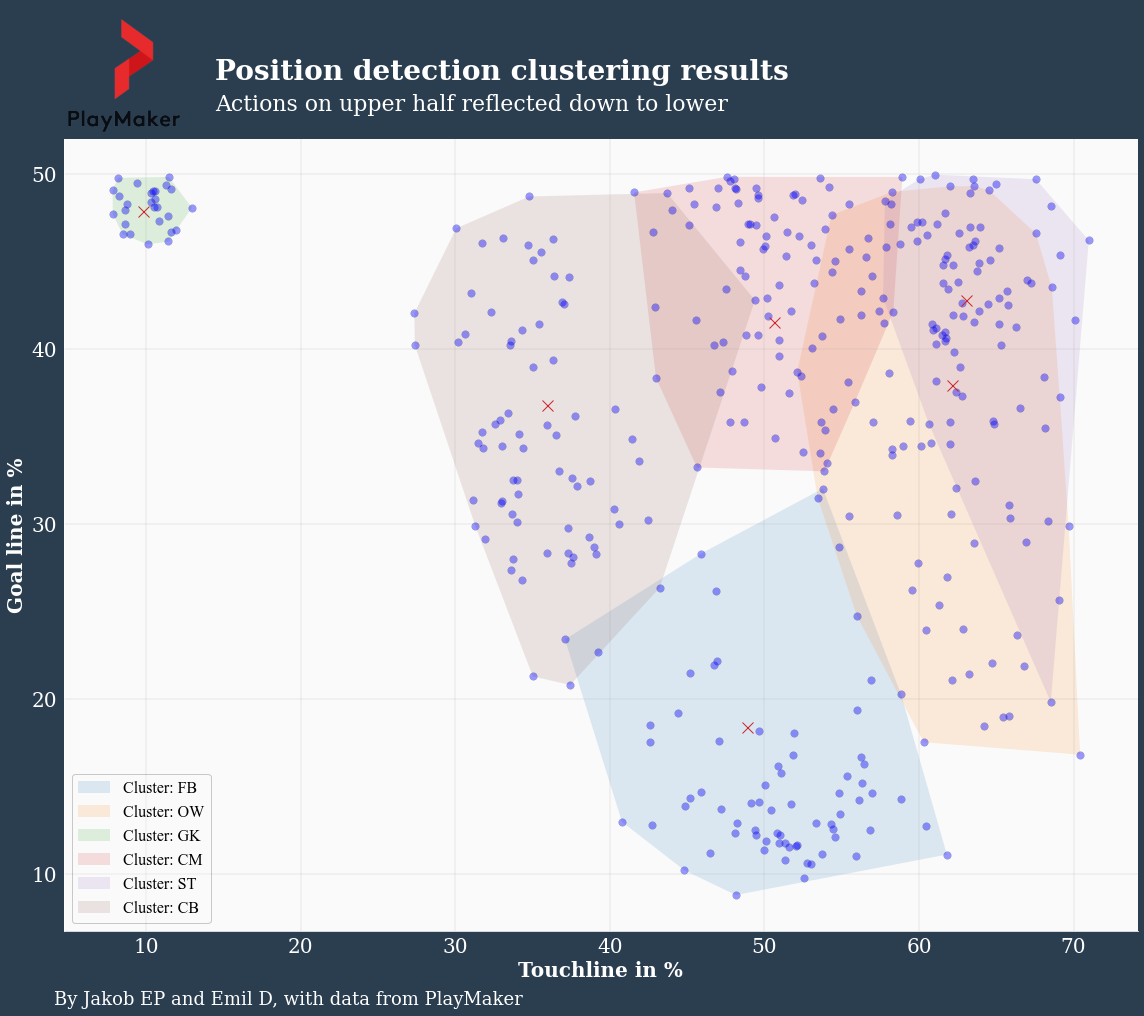

Confusion matrix result for position detection: 

+------------+------+------+------+------+------+-----------+
|            |   ST |   CM |   OW |   FB |   CB |   #actual |
+============+======+======+======+======+======+===========+
| ST         |   49 |    0 |    4 |    0 |    0 |        53 |
+------------+------+------+------+------+------+-----------+
| CM         |    1 |   74 |   15 |    1 |    2 |        93 |
+------------+------+------+------+------+------+-----------+
| OW         |    2 |    2 |   54 |    2 |    0 |        60 |
+------------+------+------+------+------+------+-----------+
| FB         |    0 |    3 |    0 |   55 |    0 |        58 |
+------------+------+------+------+------+------+-----------+
| CB         |    0 |    0 |    0 |    6 |   71 |        77 |
+------------+------+------+------+------+------+-----------+
| #predicted |   52 |   79 |   73 |   64 |   73 |       341 |
+------------+------+------+------+------+------+-----------+
Confusion matrix cla

In [6]:
# Detect the positions
df_detected_positions_PL = helper.find_positions(df_all_actions = df_all_actions_PL,
                                          df_KPI = df_KPI_PL,
                                          kpis_for_clustering = kpis_for_clustering,
                                          only_passes_actions=only_passes,
                                          scaler = MinMaxScaler(), 
                                          show_plot=True,           
                                          )

# Compare detected positions to validation data
dict_validation_results_pos_PL = validate.create_validation_dataframes(
    df_detected_positions_PL, "Player_name", "player",
    "Position", "Cluster")

# Find the resulting dataframe from the dictionary
df_result_pos_PL = dict_validation_results_pos_PL['df_result']
df_correct_pos_PL = dict_validation_results_pos_PL['df_correct']
df_incorrect_pos_PL = dict_validation_results_pos_PL['df_incorrect']

# Compute and show the confusion matrix with accuracy
print("Confusion matrix result for position detection: \n")
df_conf_PL = validate.confusion_matrix(df_result_pos_PL, positions, 'predicted_class', 'actual_class', show_results=True)

# Compute confusion matrix metrics
print("Confusion matrix class metrics for position detection: \n")
df_class_metrics_pos_PL = validate.confusion_matrix_class_metrics(df_conf_PL, positions, show_results=True)


### 5.2 Allsvenskan 21

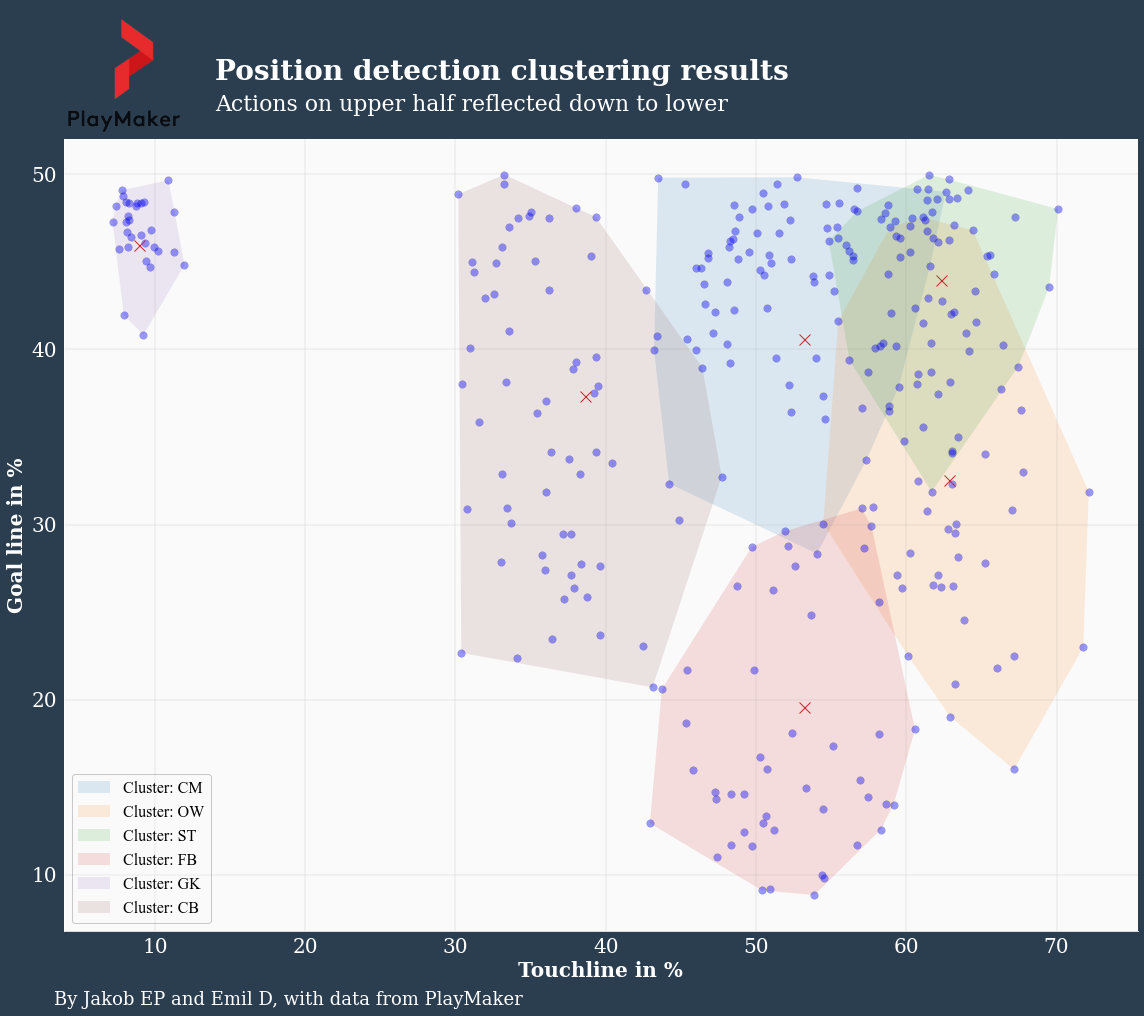

Confusion matrix result for position detection: 

+------------+------+------+------+------+------+-----------+
|            |   ST |   CM |   OW |   FB |   CB |   #actual |
+============+======+======+======+======+======+===========+
| ST         |   42 |    0 |    4 |    0 |    0 |        46 |
+------------+------+------+------+------+------+-----------+
| CM         |    4 |   61 |    7 |    1 |    3 |        76 |
+------------+------+------+------+------+------+-----------+
| OW         |    4 |    9 |   40 |    6 |    0 |        59 |
+------------+------+------+------+------+------+-----------+
| FB         |    0 |    2 |    1 |   36 |    2 |        41 |
+------------+------+------+------+------+------+-----------+
| CB         |    0 |    0 |    0 |    2 |   57 |        59 |
+------------+------+------+------+------+------+-----------+
| #predicted |   50 |   72 |   52 |   45 |   62 |       281 |
+------------+------+------+------+------+------+-----------+
Confusion matrix cla

In [7]:
# Detect the positions
df_detected_positions_Swe = helper.find_positions(df_all_actions = df_all_actions_Swe,
                                          df_KPI = df_KPI_Swe,
                                          kpis_for_clustering = kpis_for_clustering,
                                          only_passes_actions=only_passes,
                                          scaler = MinMaxScaler(), 
                                          show_plot=True,           
                                          )

# Compare detected positions to validation data
dict_validation_results_pos_Swe = validate.create_validation_dataframes(
    df_detected_positions_Swe, "Player_name", "player",
    "Position", "Cluster")

# Find the resulting dataframe from the dictionary
df_result_pos_Swe = dict_validation_results_pos_Swe['df_result']
df_correct_pos_Swe = dict_validation_results_pos_Swe['df_correct']
df_incorrect_pos_Swe = dict_validation_results_pos_Swe['df_incorrect']

# Compute and show the confusion matrix with accuracy
print("Confusion matrix result for position detection: \n")
df_conf_Swe = validate.confusion_matrix(df_result_pos_Swe, positions, 'predicted_class', 'actual_class', show_results=True)

# Compute confusion matrix metrics
print("Confusion matrix class metrics for position detection: \n")
df_class_metrics_pos_Swe = validate.confusion_matrix_class_metrics(df_conf_Swe, positions, show_results=True)
